# CM[2] DNN using Given Network Parameters

Importing required libraries 

In [2]:
import tensorflow as tf

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Loading cleaned and normalized dataset
load_dataset = pd.read_csv("cleaned_normalized_coviddata.csv")
df = load_dataset.iloc[:,3:]
# Splitting the data into input and output values
x=df.iloc[:,:-3]
y=df.iloc[:,-3:].astype('int')

In [5]:
# Splitting the data in training and testing dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 100)

In [6]:
x_train.shape

(1104, 11)

## Multi Layer Perceptron

###  Combining all output Labels

In [7]:
tf.keras.backend.clear_session()
mlp = tf.keras.Sequential([     tf.keras.Input(shape=(11,)),
                                tf.keras.layers.Dense(20,activation = 'relu'),
                                tf.keras.layers.Dense(20,activation = 'relu'),
                                tf.keras.layers.Dense(3,activation = 'softmax')])
mlp.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                240       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 63        
Total params: 723
Trainable params: 723
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Compiling the model
mlp.compile(optimizer='adam',
              loss='BinaryCrossentropy',
              metrics=['accuracy'])

In [9]:
%%time
history_mlp = mlp.fit(x_train,y_train,epochs = 100,validation_split=0.2)

Epoch 1/100
28/28 [==============================] - 1s 5ms/step - loss: 0.6258 - accuracy: 0.1484 - val_loss: 0.5710 - val_accuracy: 0.2217
Epoch 2/100
28/28 [==============================] - 0s 2ms/step - loss: 0.5326 - accuracy: 0.2333 - val_loss: 0.4917 - val_accuracy: 0.2896
Epoch 3/100
28/28 [==============================] - 0s 1ms/step - loss: 0.4653 - accuracy: 0.2809 - val_loss: 0.4348 - val_accuracy: 0.2986
Epoch 4/100
28/28 [==============================] - 0s 2ms/step - loss: 0.4189 - accuracy: 0.3296 - val_loss: 0.3949 - val_accuracy: 0.3348
Epoch 5/100
28/28 [==============================] - 0s 2ms/step - loss: 0.3879 - accuracy: 0.4111 - val_loss: 0.3658 - val_accuracy: 0.4072
Epoch 6/100
28/28 [==============================] - 0s 2ms/step - loss: 0.3658 - accuracy: 0.4677 - val_loss: 0.3429 - val_accuracy: 0.4253
Epoch 7/100
28/28 [==============================] - 0s 1ms/step - loss: 0.3481 - accuracy: 0.4813 - val_loss: 0.3252 - val_accuracy: 0.4253
Epoch 8/100
2

Epoch 59/100
28/28 [==============================] - 0s 2ms/step - loss: 0.1711 - accuracy: 0.4972 - val_loss: 0.1818 - val_accuracy: 0.5158
Epoch 60/100
28/28 [==============================] - 0s 2ms/step - loss: 0.1702 - accuracy: 0.4689 - val_loss: 0.1820 - val_accuracy: 0.4932
Epoch 61/100
28/28 [==============================] - 0s 1ms/step - loss: 0.1697 - accuracy: 0.4847 - val_loss: 0.1812 - val_accuracy: 0.5204
Epoch 62/100
28/28 [==============================] - 0s 1ms/step - loss: 0.1691 - accuracy: 0.4881 - val_loss: 0.1805 - val_accuracy: 0.5023
Epoch 63/100
28/28 [==============================] - 0s 2ms/step - loss: 0.1689 - accuracy: 0.4836 - val_loss: 0.1805 - val_accuracy: 0.5113
Epoch 64/100
28/28 [==============================] - 0s 1ms/step - loss: 0.1678 - accuracy: 0.5006 - val_loss: 0.1795 - val_accuracy: 0.5249
Epoch 65/100
28/28 [==============================] - 0s 1ms/step - loss: 0.1673 - accuracy: 0.5040 - val_loss: 0.1809 - val_accuracy: 0.5068
Epoch 

 #### The Model has a training accuracy of 65.69 and validation accuracy of 69.23 at 100th Epoch. The execution time/ Epoch is 2ms and total execution time is around 5 sec . ( Approximate values) 

In [10]:
%%time
mlp.evaluate(x_test,y_test)

9/9 [==============================] - 0s 0s/step - loss: 0.2084 - accuracy: 0.5217
Wall time: 48.2 ms


[0.2084493190050125, 0.52173912525177]

#### The testing accuracy for combined labels is 65.22%. The execution time/Epoch is 1ms and total execution time for testing is 56ms ( Approximate Values)

### Default: Label: Recovered

In [11]:
tf.keras.backend.clear_session()
# Creating the model using the given parameters
mlp_recovered = tf.keras.Sequential([     tf.keras.Input(shape=(11,)),
                                tf.keras.layers.Dense(20,activation = 'relu'),
                                tf.keras.layers.Dense(20,activation = 'relu'),
                                tf.keras.layers.Dense(1,activation = 'softmax')])
mlp_recovered.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                240       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
Total params: 681
Trainable params: 681
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Compiling the model
mlp_recovered.compile(optimizer='adam',
              loss='BinaryCrossentropy',
              metrics=['accuracy'])

In [28]:
%%time
his_recovered = mlp_recovered.fit(x_train,y_train.iloc[:,-1],epochs = 100,validation_split=0.2)

Epoch 1/100
28/28 [==============================] - 0s 4ms/step - loss: 0.6125 - accuracy: 0.6195 - val_loss: 0.5878 - val_accuracy: 0.6516
Epoch 2/100
28/28 [==============================] - 0s 2ms/step - loss: 0.5601 - accuracy: 0.6195 - val_loss: 0.5529 - val_accuracy: 0.6516
Epoch 3/100
28/28 [==============================] - 0s 1ms/step - loss: 0.5192 - accuracy: 0.6195 - val_loss: 0.5212 - val_accuracy: 0.6516
Epoch 4/100
28/28 [==============================] - 0s 2ms/step - loss: 0.4862 - accuracy: 0.6195 - val_loss: 0.4925 - val_accuracy: 0.6516
Epoch 5/100
28/28 [==============================] - 0s 1ms/step - loss: 0.4539 - accuracy: 0.6195 - val_loss: 0.4677 - val_accuracy: 0.6516
Epoch 6/100
28/28 [==============================] - 0s 2ms/step - loss: 0.4269 - accuracy: 0.6195 - val_loss: 0.4425 - val_accuracy: 0.6516
Epoch 7/100
28/28 [==============================] - 0s 2ms/step - loss: 0.4015 - accuracy: 0.6195 - val_loss: 0.4223 - val_accuracy: 0.6516
Epoch 8/100
2

Epoch 59/100
28/28 [==============================] - 0s 1ms/step - loss: 0.1801 - accuracy: 0.6195 - val_loss: 0.2068 - val_accuracy: 0.6516
Epoch 60/100
28/28 [==============================] - 0s 2ms/step - loss: 0.1806 - accuracy: 0.6195 - val_loss: 0.2083 - val_accuracy: 0.6516
Epoch 61/100
28/28 [==============================] - 0s 1ms/step - loss: 0.1801 - accuracy: 0.6195 - val_loss: 0.2084 - val_accuracy: 0.6516
Epoch 62/100
28/28 [==============================] - 0s 1ms/step - loss: 0.1824 - accuracy: 0.6195 - val_loss: 0.2053 - val_accuracy: 0.6516
Epoch 63/100
28/28 [==============================] - 0s 2ms/step - loss: 0.1801 - accuracy: 0.6195 - val_loss: 0.2086 - val_accuracy: 0.6516
Epoch 64/100
28/28 [==============================] - 0s 2ms/step - loss: 0.1781 - accuracy: 0.6195 - val_loss: 0.2064 - val_accuracy: 0.6516
Epoch 65/100
28/28 [==============================] - 0s 2ms/step - loss: 0.1805 - accuracy: 0.6195 - val_loss: 0.2069 - val_accuracy: 0.6516
Epoch 

 #### The Model has a training accuracy of 61.95 and validation accuracy of 65.16 at 100th Epoch. The execution time/ Epoch is 2ms and total execution time is around 4.87 sec . ( Approximate values) 

In [29]:
%%time
mlp_recovered.evaluate(x_test,y_test.iloc[:,-1])

9/9 [==============================] - 0s 991us/step - loss: 0.1638 - accuracy: 0.6268
Wall time: 52.9 ms


[0.16381973028182983, 0.6268116235733032]

#### The testing accuracy is 62.68%. The execution time/Epoch is almost 1ms and total execution time for testing is 52.9ms ( Approximate Values)

### Default: Label: Deaths

In [32]:
tf.keras.backend.clear_session()
# creating the model using the default parameters for label: deaths
mlp_deaths = tf.keras.Sequential([     tf.keras.Input(shape=(11,)),
                                tf.keras.layers.Dense(20,activation = 'relu'),
                                tf.keras.layers.Dense(20,activation = 'relu'),
                                tf.keras.layers.Dense(1,activation = 'softmax')])
mlp_deaths.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                240       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
Total params: 681
Trainable params: 681
Non-trainable params: 0
_________________________________________________________________


In [33]:
# compiling the model
mlp_deaths.compile(optimizer='adam',
              loss='BinaryCrossentropy',
              metrics=['accuracy'])

In [34]:
%%time
his_deaths = mlp_deaths.fit(x_train,y_train.iloc[:,-2],epochs = 100,validation_split=0.2)

Epoch 1/100
28/28 [==============================] - 0s 4ms/step - loss: 0.6904 - accuracy: 0.9094 - val_loss: 0.5677 - val_accuracy: 0.9005
Epoch 2/100
28/28 [==============================] - 0s 2ms/step - loss: 0.4842 - accuracy: 0.9094 - val_loss: 0.4537 - val_accuracy: 0.9005
Epoch 3/100
28/28 [==============================] - 0s 2ms/step - loss: 0.3983 - accuracy: 0.9094 - val_loss: 0.3936 - val_accuracy: 0.9005
Epoch 4/100
28/28 [==============================] - 0s 2ms/step - loss: 0.3514 - accuracy: 0.9094 - val_loss: 0.3535 - val_accuracy: 0.9005
Epoch 5/100
28/28 [==============================] - 0s 2ms/step - loss: 0.3201 - accuracy: 0.9094 - val_loss: 0.3261 - val_accuracy: 0.9005
Epoch 6/100
28/28 [==============================] - 0s 2ms/step - loss: 0.2991 - accuracy: 0.9094 - val_loss: 0.3083 - val_accuracy: 0.9005
Epoch 7/100
28/28 [==============================] - 0s 2ms/step - loss: 0.2844 - accuracy: 0.9094 - val_loss: 0.2967 - val_accuracy: 0.9005
Epoch 8/100
2

Epoch 59/100
28/28 [==============================] - 0s 2ms/step - loss: 0.1975 - accuracy: 0.9094 - val_loss: 0.2457 - val_accuracy: 0.9005
Epoch 60/100
28/28 [==============================] - 0s 2ms/step - loss: 0.1969 - accuracy: 0.9094 - val_loss: 0.2461 - val_accuracy: 0.9005
Epoch 61/100
28/28 [==============================] - 0s 1ms/step - loss: 0.1961 - accuracy: 0.9094 - val_loss: 0.2530 - val_accuracy: 0.9005
Epoch 62/100
28/28 [==============================] - 0s 2ms/step - loss: 0.1971 - accuracy: 0.9094 - val_loss: 0.2461 - val_accuracy: 0.9005
Epoch 63/100
28/28 [==============================] - 0s 1ms/step - loss: 0.1955 - accuracy: 0.9094 - val_loss: 0.2480 - val_accuracy: 0.9005
Epoch 64/100
28/28 [==============================] - 0s 1ms/step - loss: 0.1954 - accuracy: 0.9094 - val_loss: 0.2460 - val_accuracy: 0.9005
Epoch 65/100
28/28 [==============================] - 0s 1ms/step - loss: 0.1949 - accuracy: 0.9094 - val_loss: 0.2467 - val_accuracy: 0.9005
Epoch 

 #### The Model has a training accuracy of 90.94 and validation accuracy of 90.05 at 100th Epoch. The execution time/ Epoch is 2ms and total execution time is around 5.01 sec . ( Approximate values) 

In [19]:
%%time
mlp_deaths.evaluate(x_test,y_test.iloc[:,:-2])

9/9 [==============================] - 0s 2ms/step - loss: 0.2983 - accuracy: 0.9493
Wall time: 366 ms


[0.2982918918132782, 0.9492753744125366]

#### The testing accuracy is 94.93%. The execution time/Epoch is almost 1ms and total execution time for testing is 366ms ( Approximate Values)

### Default: Label: Confirmed

In [38]:
tf.keras.backend.clear_session()
# Creating model using default parameters for label: confirmed
mlp_confirmed = tf.keras.Sequential([     tf.keras.Input(shape=(11,)),
                                tf.keras.layers.Dense(20,activation = 'relu'),
                                tf.keras.layers.Dense(20,activation = 'relu'),
                                tf.keras.layers.Dense(1,activation = 'softmax')])
mlp_confirmed.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                240       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
Total params: 681
Trainable params: 681
Non-trainable params: 0
_________________________________________________________________


In [40]:
# Compiling the model
mlp_confirmed.compile(optimizer='adam',
              loss='BinaryCrossentropy',
              metrics=['accuracy'])

In [41]:
%%time
his_confirmed = mlp_confirmed.fit(x_train,y_train.iloc[:,-3],epochs = 100,validation_split=0.2)

Epoch 1/100
28/28 [==============================] - 0s 4ms/step - loss: 0.7352 - accuracy: 0.9604 - val_loss: 0.5469 - val_accuracy: 0.9910
Epoch 2/100
28/28 [==============================] - 0s 1ms/step - loss: 0.4576 - accuracy: 0.9604 - val_loss: 0.3381 - val_accuracy: 0.9910
Epoch 3/100
28/28 [==============================] - 0s 2ms/step - loss: 0.3235 - accuracy: 0.9604 - val_loss: 0.2254 - val_accuracy: 0.9910
Epoch 4/100
28/28 [==============================] - 0s 2ms/step - loss: 0.2512 - accuracy: 0.9604 - val_loss: 0.1572 - val_accuracy: 0.9910
Epoch 5/100
28/28 [==============================] - 0s 2ms/step - loss: 0.2127 - accuracy: 0.9604 - val_loss: 0.1175 - val_accuracy: 0.9910
Epoch 6/100
28/28 [==============================] - 0s 2ms/step - loss: 0.1911 - accuracy: 0.9604 - val_loss: 0.0962 - val_accuracy: 0.9910
Epoch 7/100
28/28 [==============================] - 0s 2ms/step - loss: 0.1788 - accuracy: 0.9604 - val_loss: 0.0814 - val_accuracy: 0.9910
Epoch 8/100
2

Epoch 59/100
28/28 [==============================] - 0s 2ms/step - loss: 0.1115 - accuracy: 0.9604 - val_loss: 0.0480 - val_accuracy: 0.9910
Epoch 60/100
28/28 [==============================] - 0s 1ms/step - loss: 0.1112 - accuracy: 0.9604 - val_loss: 0.0453 - val_accuracy: 0.9910
Epoch 61/100
28/28 [==============================] - 0s 2ms/step - loss: 0.1108 - accuracy: 0.9604 - val_loss: 0.0490 - val_accuracy: 0.9910
Epoch 62/100
28/28 [==============================] - 0s 1ms/step - loss: 0.1108 - accuracy: 0.9604 - val_loss: 0.0475 - val_accuracy: 0.9910
Epoch 63/100
28/28 [==============================] - 0s 2ms/step - loss: 0.1098 - accuracy: 0.9604 - val_loss: 0.0477 - val_accuracy: 0.9910
Epoch 64/100
28/28 [==============================] - 0s 2ms/step - loss: 0.1100 - accuracy: 0.9604 - val_loss: 0.0456 - val_accuracy: 0.9910
Epoch 65/100
28/28 [==============================] - 0s 1ms/step - loss: 0.1094 - accuracy: 0.9604 - val_loss: 0.0490 - val_accuracy: 0.9910
Epoch 

 #### The Model has a training accuracy of 96.04 and validation accuracy of 99.10 at 100th Epoch. The execution time/ Epoch is 2ms and total execution time is around 4.94 sec . ( Approximate values) 

In [43]:
%%time
mlp_confirmed.evaluate(x_test,y_test.iloc[:,-3])

9/9 [==============================] - 0s 1ms/step - loss: 0.1627 - accuracy: 0.9493
Wall time: 73.8 ms


[0.16267575323581696, 0.9492753744125366]

#### The testing accuracy is 94.93%. The execution time/Epoch is almost 1ms and total execution time for testing is 73.8ms ( Approximate Values)

## MLP on PCA

In [45]:
%store -r pca_features

In [46]:
x_ptrain,x_ptest,y_ptrain,y_ptest=train_test_split(pca_features[:,0:4],y,test_size = 0.2,random_state = 100)

In [55]:
tf.keras.backend.clear_session()
# Creating model for default parameters using PCA inputs
mlp_pca = tf.keras.Sequential([ tf.keras.Input(shape=(4,)),
                                tf.keras.layers.Dense(20,activation = 'relu'),
                                tf.keras.layers.Dense(20,activation = 'relu'),
                                tf.keras.layers.Dense(3,activation = 'softmax')])
mlp_pca.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                100       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 63        
Total params: 583
Trainable params: 583
Non-trainable params: 0
_________________________________________________________________


In [56]:
#Compiling the model
mlp_pca.compile(optimizer='adam',
              loss='BinaryCrossentropy',
              metrics=['accuracy'])

In [57]:
%%time
his_pmlp = mlp_pca.fit(x_ptrain,y_ptrain,epochs = 100,validation_split=0.2)

Epoch 1/100
28/28 [==============================] - 0s 5ms/step - loss: 0.7237 - accuracy: 0.3817 - val_loss: 0.6397 - val_accuracy: 0.5566
Epoch 2/100
28/28 [==============================] - 0s 2ms/step - loss: 0.5944 - accuracy: 0.7271 - val_loss: 0.5347 - val_accuracy: 0.8281
Epoch 3/100
28/28 [==============================] - 0s 2ms/step - loss: 0.5046 - accuracy: 0.8245 - val_loss: 0.4578 - val_accuracy: 0.7964
Epoch 4/100
28/28 [==============================] - 0s 2ms/step - loss: 0.4431 - accuracy: 0.8403 - val_loss: 0.4086 - val_accuracy: 0.8371
Epoch 5/100
28/28 [==============================] - 0s 2ms/step - loss: 0.4040 - accuracy: 0.8834 - val_loss: 0.3732 - val_accuracy: 0.9186
Epoch 6/100
28/28 [==============================] - 0s 2ms/step - loss: 0.3769 - accuracy: 0.9105 - val_loss: 0.3497 - val_accuracy: 0.9231
Epoch 7/100
28/28 [==============================] - 0s 2ms/step - loss: 0.3592 - accuracy: 0.9094 - val_loss: 0.3325 - val_accuracy: 0.9140
Epoch 8/100
2

Epoch 59/100
28/28 [==============================] - 0s 1ms/step - loss: 0.2354 - accuracy: 0.6399 - val_loss: 0.2227 - val_accuracy: 0.6380
Epoch 60/100
28/28 [==============================] - 0s 1ms/step - loss: 0.2339 - accuracy: 0.6410 - val_loss: 0.2221 - val_accuracy: 0.6290
Epoch 61/100
28/28 [==============================] - 0s 1ms/step - loss: 0.2326 - accuracy: 0.6308 - val_loss: 0.2199 - val_accuracy: 0.6290
Epoch 62/100
28/28 [==============================] - 0s 1ms/step - loss: 0.2324 - accuracy: 0.6501 - val_loss: 0.2207 - val_accuracy: 0.6290
Epoch 63/100
28/28 [==============================] - 0s 2ms/step - loss: 0.2320 - accuracy: 0.6387 - val_loss: 0.2195 - val_accuracy: 0.6380
Epoch 64/100
28/28 [==============================] - 0s 1ms/step - loss: 0.2309 - accuracy: 0.6501 - val_loss: 0.2188 - val_accuracy: 0.6380
Epoch 65/100
28/28 [==============================] - 0s 1ms/step - loss: 0.2298 - accuracy: 0.6365 - val_loss: 0.2191 - val_accuracy: 0.6380
Epoch 

#### The training and validation accuracies are 52.77% and 56.11%. The execution time/Epoch is 1ms and total execution time is 4.87s ( Approximate values)

In [54]:
%%time
mlp_pca.evaluate(x_ptest,y_ptest)

9/9 [==============================] - 0s 1000us/step - loss: 0.2470 - accuracy: 0.5362
Wall time: 49.7 ms


[0.24697904288768768, 0.5362318754196167]

#### The testing accuracy is 53.62%. The execution time/Epoch = 1ms and total execution time is 49.7ms (Approximate Values)

### PCA: Label: Recovered

In [61]:
tf.keras.backend.clear_session()
# Creating the model using the default features on PCA input, Label = Recovered 
mlp_pca_recovered = tf.keras.Sequential([    tf.keras.Input(shape=(4,)),
                                tf.keras.layers.Dense(20,activation = 'relu'),
                                tf.keras.layers.Dense(20,activation = 'relu'),
                                tf.keras.layers.Dense(1,activation = 'softmax')])
mlp_pca_recovered.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                100       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________


In [62]:
# Compiling the model
mlp_pca_recovered.compile(optimizer='adam',
              loss='BinaryCrossentropy',
              metrics=['accuracy'])

In [63]:
%%time
his_precovered = mlp_pca_recovered.fit(x_ptrain,y_ptrain.iloc[:,-1],epochs = 100,validation_split=0.2)

Epoch 1/100
28/28 [==============================] - 0s 4ms/step - loss: 0.6634 - accuracy: 0.6195 - val_loss: 0.6347 - val_accuracy: 0.6516
Epoch 2/100
28/28 [==============================] - 0s 2ms/step - loss: 0.6111 - accuracy: 0.6195 - val_loss: 0.6022 - val_accuracy: 0.6516
Epoch 3/100
28/28 [==============================] - 0s 2ms/step - loss: 0.5792 - accuracy: 0.6195 - val_loss: 0.5752 - val_accuracy: 0.6516
Epoch 4/100
28/28 [==============================] - 0s 2ms/step - loss: 0.5520 - accuracy: 0.6195 - val_loss: 0.5540 - val_accuracy: 0.6516
Epoch 5/100
28/28 [==============================] - 0s 1ms/step - loss: 0.5293 - accuracy: 0.6195 - val_loss: 0.5370 - val_accuracy: 0.6516
Epoch 6/100
28/28 [==============================] - 0s 2ms/step - loss: 0.5086 - accuracy: 0.6195 - val_loss: 0.5220 - val_accuracy: 0.6516
Epoch 7/100
28/28 [==============================] - 0s 2ms/step - loss: 0.4894 - accuracy: 0.6195 - val_loss: 0.5089 - val_accuracy: 0.6516
Epoch 8/100
2

Epoch 59/100
28/28 [==============================] - 0s 2ms/step - loss: 0.2849 - accuracy: 0.6195 - val_loss: 0.3155 - val_accuracy: 0.6516
Epoch 60/100
28/28 [==============================] - 0s 1ms/step - loss: 0.2846 - accuracy: 0.6195 - val_loss: 0.3151 - val_accuracy: 0.6516
Epoch 61/100
28/28 [==============================] - 0s 2ms/step - loss: 0.2830 - accuracy: 0.6195 - val_loss: 0.3115 - val_accuracy: 0.6516
Epoch 62/100
28/28 [==============================] - 0s 2ms/step - loss: 0.2812 - accuracy: 0.6195 - val_loss: 0.3135 - val_accuracy: 0.6516
Epoch 63/100
28/28 [==============================] - 0s 1ms/step - loss: 0.2801 - accuracy: 0.6195 - val_loss: 0.3118 - val_accuracy: 0.6516
Epoch 64/100
28/28 [==============================] - 0s 2ms/step - loss: 0.2797 - accuracy: 0.6195 - val_loss: 0.3096 - val_accuracy: 0.6516
Epoch 65/100
28/28 [==============================] - 0s 2ms/step - loss: 0.2793 - accuracy: 0.6195 - val_loss: 0.3086 - val_accuracy: 0.6516
Epoch 

#### The training and validation accuracies are 61.95% and 65.16%. The execution time/Epoch is 1ms and total execution time is 5.14s ( Approximate values)

In [64]:
%%time
mlp_pca_recovered.evaluate(x_ptest,y_ptest.iloc[:,-1])

9/9 [==============================] - 0s 1000us/step - loss: 0.2638 - accuracy: 0.6268
Wall time: 49.1 ms


[0.2637755274772644, 0.6268116235733032]

#### The testing accuracy is 62.68%. The execution time/Epoch = 1ms and total execution time is 49.1ms (Approximate Values)

### PCA: Label: Deaths

In [73]:
tf.keras.backend.clear_session()
# Creating the model using the default features on PCA input, Label = Deaths
mlp_pca_deaths = tf.keras.Sequential([     tf.keras.Input(shape=(4,)),
                                tf.keras.layers.Dense(20,activation = 'relu'),
                                tf.keras.layers.Dense(20,activation = 'relu'),
                                tf.keras.layers.Dense(1,activation = 'softmax')])
mlp_pca_deaths.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                100       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________


In [74]:
mlp_pca_deaths.compile(optimizer='adam',
              loss='BinaryCrossentropy',
              metrics=['accuracy'])

In [75]:
%%time
his_pdeaths = mlp_pca_deaths.fit(x_ptrain,y_ptrain.iloc[:,-2],epochs = 100,validation_split=0.2)

Epoch 1/100
28/28 [==============================] - 0s 4ms/step - loss: 0.5170 - accuracy: 0.9094 - val_loss: 0.4610 - val_accuracy: 0.9005
Epoch 2/100
28/28 [==============================] - 0s 1ms/step - loss: 0.4157 - accuracy: 0.9094 - val_loss: 0.3947 - val_accuracy: 0.9005
Epoch 3/100
28/28 [==============================] - 0s 2ms/step - loss: 0.3621 - accuracy: 0.9094 - val_loss: 0.3473 - val_accuracy: 0.9005
Epoch 4/100
28/28 [==============================] - 0s 1ms/step - loss: 0.3319 - accuracy: 0.9094 - val_loss: 0.3266 - val_accuracy: 0.9005
Epoch 5/100
28/28 [==============================] - 0s 1ms/step - loss: 0.3166 - accuracy: 0.9094 - val_loss: 0.3119 - val_accuracy: 0.9005
Epoch 6/100
28/28 [==============================] - 0s 2ms/step - loss: 0.3077 - accuracy: 0.9094 - val_loss: 0.3025 - val_accuracy: 0.9005
Epoch 7/100
28/28 [==============================] - 0s 2ms/step - loss: 0.3015 - accuracy: 0.9094 - val_loss: 0.2965 - val_accuracy: 0.9005
Epoch 8/100
2

#### The training and validation accuracies are 90.94% and 90.05%. The execution time/Epoch is 2ms and total execution time is 5.09s ( Approximate values)

In [76]:
%%time
mlp_pca_deaths.evaluate(x_ptest,y_ptest.iloc[:,:-2])

9/9 [==============================] - 0s 999us/step - loss: 0.2518 - accuracy: 0.9493
Wall time: 106 ms


[0.2517583966255188, 0.9492753744125366]

#### The testing accuracy is 94.93%. The execution time/Epoch = 1ms and total execution time is 119ms (Approximate Values)

### PCA: Label: Confirmed

In [78]:
tf.keras.backend.clear_session()
# Creating the model using the default features on PCA input, Label = Confirmed
mlp_pca_confirmed = tf.keras.Sequential([     tf.keras.Input(shape=(4,)),
                                tf.keras.layers.Dense(20,activation = 'relu'),
                                tf.keras.layers.Dense(20,activation = 'relu'),
                                tf.keras.layers.Dense(1,activation = 'softmax')])
mlp_pca_confirmed.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                100       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________


In [79]:
# Compiling the model
mlp_pca_confirmed.compile(optimizer='adam',
              loss='BinaryCrossentropy',
              metrics=['accuracy'])

In [80]:
%%time
his_pconfirmed = mlp_pca_confirmed.fit(x_ptrain,y_ptrain.iloc[:,-3],epochs = 100,validation_split=0.2)

Epoch 1/100
28/28 [==============================] - 0s 4ms/step - loss: 0.6423 - accuracy: 0.9604 - val_loss: 0.4768 - val_accuracy: 0.9910
Epoch 2/100
28/28 [==============================] - 0s 2ms/step - loss: 0.3963 - accuracy: 0.9604 - val_loss: 0.2859 - val_accuracy: 0.9910
Epoch 3/100
28/28 [==============================] - 0s 2ms/step - loss: 0.2745 - accuracy: 0.9604 - val_loss: 0.1802 - val_accuracy: 0.9910
Epoch 4/100
28/28 [==============================] - 0s 2ms/step - loss: 0.2127 - accuracy: 0.9604 - val_loss: 0.1266 - val_accuracy: 0.9910
Epoch 5/100
28/28 [==============================] - 0s 1ms/step - loss: 0.1846 - accuracy: 0.9604 - val_loss: 0.0948 - val_accuracy: 0.9910
Epoch 6/100
28/28 [==============================] - 0s 1ms/step - loss: 0.1709 - accuracy: 0.9604 - val_loss: 0.0801 - val_accuracy: 0.9910
Epoch 7/100
28/28 [==============================] - 0s 1ms/step - loss: 0.1643 - accuracy: 0.9604 - val_loss: 0.0712 - val_accuracy: 0.9910
Epoch 8/100
2

Epoch 59/100
28/28 [==============================] - 0s 2ms/step - loss: 0.1292 - accuracy: 0.9604 - val_loss: 0.0488 - val_accuracy: 0.9910
Epoch 60/100
28/28 [==============================] - 0s 1ms/step - loss: 0.1284 - accuracy: 0.9604 - val_loss: 0.0508 - val_accuracy: 0.9910
Epoch 61/100
28/28 [==============================] - 0s 2ms/step - loss: 0.1284 - accuracy: 0.9604 - val_loss: 0.0498 - val_accuracy: 0.9910
Epoch 62/100
28/28 [==============================] - 0s 1ms/step - loss: 0.1283 - accuracy: 0.9604 - val_loss: 0.0495 - val_accuracy: 0.9910
Epoch 63/100
28/28 [==============================] - 0s 1ms/step - loss: 0.1275 - accuracy: 0.9604 - val_loss: 0.0480 - val_accuracy: 0.9910
Epoch 64/100
28/28 [==============================] - 0s 1ms/step - loss: 0.1277 - accuracy: 0.9604 - val_loss: 0.0508 - val_accuracy: 0.9910
Epoch 65/100
28/28 [==============================] - 0s 1ms/step - loss: 0.1276 - accuracy: 0.9604 - val_loss: 0.0484 - val_accuracy: 0.9910
Epoch 

#### The training and validation accuracies are 96.04% and 99.10%. The execution time/Epoch is 1ms and total execution time is 4.8s ( Approximate values)

In [81]:
%%time
mlp_pca_confirmed.evaluate(x_ptest,y_ptest.iloc[:,-3])

9/9 [==============================] - 0s 1000us/step - loss: 0.1621 - accuracy: 0.9493
Wall time: 50 ms


[0.16212889552116394, 0.9492753744125366]

#### The testing accuracy is 94.93%. The execution time/Epoch = 1ms and total execution time is 50ms (Approximate Values)

### CM[2] Summary

Different fully connected deep learning models are created and executed using the default parameters i.e the parameters specified in the question. The following are the different types of models:<br>
&ensp; DNN by combining all the output labels together and using all the inputs<br>
&ensp; DNN by using each output Label at a time and using all the inputs<br>
&ensp; DNN by combining all the output labels together and using PCA inputs ( 4 components )<br>
&ensp; DNN by using each output Label at a time and using PCA inouts ( 4 components )<br>
Based on the above models, individual lables are selected using all the given inputs. A detailed analysis about the model parameters,runtime accuracies and losses are described in CM[3] 

# CM[3] Your Own Model

## Modified DNN Architecture

### Modified: Label: Recovered

In [93]:
tf.keras.backend.clear_session()
# The model is created by modifying the default parameters to improve the accuracy of the models
modified_mlp_recovered = tf.keras.Sequential([     tf.keras.Input(shape=(11,)),
                                tf.keras.layers.Dense(20,activation = 'relu'),
                                tf.keras.layers.Dense(20,activation = 'relu'),
                                tf.keras.layers.Dense(1,activation = 'sigmoid')])
modified_mlp_recovered.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                240       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
Total params: 681
Trainable params: 681
Non-trainable params: 0
_________________________________________________________________


In [94]:
# Compiling the model
modified_mlp_recovered.compile(optimizer='adam',
              loss='BinaryCrossentropy',
              metrics=['accuracy'])

In [95]:
%%time
his_m_rec = modified_mlp_recovered.fit(x_train,y_train.iloc[:,-1],epochs = 200,validation_split=0.2)

Epoch 1/200
28/28 [==============================] - 0s 5ms/step - loss: 0.6485 - accuracy: 0.6014 - val_loss: 0.6066 - val_accuracy: 0.6878
Epoch 2/200
28/28 [==============================] - 0s 2ms/step - loss: 0.5899 - accuracy: 0.7486 - val_loss: 0.5620 - val_accuracy: 0.8054
Epoch 3/200
28/28 [==============================] - 0s 2ms/step - loss: 0.5461 - accuracy: 0.7950 - val_loss: 0.5221 - val_accuracy: 0.8100
Epoch 4/200
28/28 [==============================] - 0s 2ms/step - loss: 0.5060 - accuracy: 0.7995 - val_loss: 0.4886 - val_accuracy: 0.8100
Epoch 5/200
28/28 [==============================] - 0s 2ms/step - loss: 0.4708 - accuracy: 0.8245 - val_loss: 0.4583 - val_accuracy: 0.8054
Epoch 6/200
28/28 [==============================] - 0s 2ms/step - loss: 0.4405 - accuracy: 0.8313 - val_loss: 0.4341 - val_accuracy: 0.8190
Epoch 7/200
28/28 [==============================] - 0s 2ms/step - loss: 0.4148 - accuracy: 0.8381 - val_loss: 0.4118 - val_accuracy: 0.8326
Epoch 8/200
2

Epoch 59/200
28/28 [==============================] - 0s 2ms/step - loss: 0.1759 - accuracy: 0.9343 - val_loss: 0.2089 - val_accuracy: 0.9457
Epoch 60/200
28/28 [==============================] - 0s 1ms/step - loss: 0.1764 - accuracy: 0.9332 - val_loss: 0.2081 - val_accuracy: 0.9367
Epoch 61/200
28/28 [==============================] - 0s 1ms/step - loss: 0.1744 - accuracy: 0.9377 - val_loss: 0.2100 - val_accuracy: 0.9367
Epoch 62/200
28/28 [==============================] - 0s 1ms/step - loss: 0.1736 - accuracy: 0.9366 - val_loss: 0.2068 - val_accuracy: 0.9412
Epoch 63/200
28/28 [==============================] - 0s 2ms/step - loss: 0.1740 - accuracy: 0.9343 - val_loss: 0.2086 - val_accuracy: 0.9367
Epoch 64/200
28/28 [==============================] - 0s 1ms/step - loss: 0.1725 - accuracy: 0.9377 - val_loss: 0.2079 - val_accuracy: 0.9457
Epoch 65/200
28/28 [==============================] - 0s 1ms/step - loss: 0.1732 - accuracy: 0.9354 - val_loss: 0.2091 - val_accuracy: 0.9367
Epoch 

28/28 [==============================] - 0s 1ms/step - loss: 0.1544 - accuracy: 0.9377 - val_loss: 0.2155 - val_accuracy: 0.9412
Epoch 174/200
28/28 [==============================] - 0s 1ms/step - loss: 0.1532 - accuracy: 0.9400 - val_loss: 0.2174 - val_accuracy: 0.9367
Epoch 175/200
28/28 [==============================] - 0s 2ms/step - loss: 0.1523 - accuracy: 0.9388 - val_loss: 0.2193 - val_accuracy: 0.9457
Epoch 176/200
28/28 [==============================] - 0s 1ms/step - loss: 0.1536 - accuracy: 0.9400 - val_loss: 0.2165 - val_accuracy: 0.9412
Epoch 177/200
28/28 [==============================] - 0s 1ms/step - loss: 0.1556 - accuracy: 0.9400 - val_loss: 0.2182 - val_accuracy: 0.9412
Epoch 178/200
28/28 [==============================] - 0s 1ms/step - loss: 0.1527 - accuracy: 0.9422 - val_loss: 0.2202 - val_accuracy: 0.9367
Epoch 179/200
28/28 [==============================] - 0s 1ms/step - loss: 0.1539 - accuracy: 0.9377 - val_loss: 0.2213 - val_accuracy: 0.9276
Epoch 180/200

#### The training and testing accuracies are 94% and 94.12% at 200th epoch. The execution time/epoch = 2ms and total execution time is 9.18s ( Approximate Values)

In [96]:
%%time
modified_mlp_recovered.evaluate(x_test,y_test.iloc[:,-1])

9/9 [==============================] - 0s 1ms/step - loss: 0.1549 - accuracy: 0.9457
Wall time: 53.5 ms


[0.15485665202140808, 0.945652186870575]

#### The testing accuracy is 94.57%. The execution time/epoch = 1ms and total execution time is 53.5ms ( Approximate values)

### Modified: Label: Deaths

In [145]:
tf.keras.backend.clear_session()
# The model is created by modifying the default parameters to improve the accuracy of the models
modified_mlp_deaths = tf.keras.Sequential([     tf.keras.Input(shape=(11,)),
                                tf.keras.layers.Dense(20,activation = 'relu'),
                                tf.keras.layers.Dense(40,activation = 'relu'),
                                tf.keras.layers.Dense(1,activation = 'sigmoid')])
modified_mlp_deaths.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                240       
_________________________________________________________________
dense_1 (Dense)              (None, 40)                840       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 41        
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [146]:
#compiling the model
modified_mlp_deaths.compile(optimizer='adam',
              loss='BinaryCrossentropy',
              metrics=['accuracy'])

In [147]:
%%time
his_m_deaths = modified_mlp_deaths.fit(x_train,y_train.iloc[:,-2],epochs = 200,validation_split=0.2)

Epoch 1/200
28/28 [==============================] - 0s 5ms/step - loss: 0.6478 - accuracy: 0.7033 - val_loss: 0.5559 - val_accuracy: 0.9005
Epoch 2/200
28/28 [==============================] - 0s 2ms/step - loss: 0.4706 - accuracy: 0.9094 - val_loss: 0.4424 - val_accuracy: 0.9005
Epoch 3/200
28/28 [==============================] - 0s 2ms/step - loss: 0.3804 - accuracy: 0.9094 - val_loss: 0.3651 - val_accuracy: 0.9005
Epoch 4/200
28/28 [==============================] - 0s 2ms/step - loss: 0.3265 - accuracy: 0.9094 - val_loss: 0.3202 - val_accuracy: 0.9005
Epoch 5/200
28/28 [==============================] - 0s 1ms/step - loss: 0.2980 - accuracy: 0.9094 - val_loss: 0.2969 - val_accuracy: 0.9005
Epoch 6/200
28/28 [==============================] - 0s 1ms/step - loss: 0.2799 - accuracy: 0.9094 - val_loss: 0.2864 - val_accuracy: 0.9005
Epoch 7/200
28/28 [==============================] - 0s 1ms/step - loss: 0.2696 - accuracy: 0.9094 - val_loss: 0.2765 - val_accuracy: 0.9005
Epoch 8/200
2

Epoch 59/200
28/28 [==============================] - 0s 2ms/step - loss: 0.1905 - accuracy: 0.9253 - val_loss: 0.2531 - val_accuracy: 0.9140
Epoch 60/200
28/28 [==============================] - 0s 2ms/step - loss: 0.1908 - accuracy: 0.9207 - val_loss: 0.2524 - val_accuracy: 0.9140
Epoch 61/200
28/28 [==============================] - 0s 2ms/step - loss: 0.1894 - accuracy: 0.9241 - val_loss: 0.2525 - val_accuracy: 0.9140
Epoch 62/200
28/28 [==============================] - 0s 1ms/step - loss: 0.1909 - accuracy: 0.9207 - val_loss: 0.2596 - val_accuracy: 0.9140
Epoch 63/200
28/28 [==============================] - 0s 2ms/step - loss: 0.1922 - accuracy: 0.9196 - val_loss: 0.2551 - val_accuracy: 0.9140
Epoch 64/200
28/28 [==============================] - 0s 1ms/step - loss: 0.1899 - accuracy: 0.9230 - val_loss: 0.2545 - val_accuracy: 0.9140
Epoch 65/200
28/28 [==============================] - 0s 1ms/step - loss: 0.1914 - accuracy: 0.9219 - val_loss: 0.2563 - val_accuracy: 0.9140
Epoch 

28/28 [==============================] - 0s 2ms/step - loss: 0.1772 - accuracy: 0.9207 - val_loss: 0.2671 - val_accuracy: 0.9140
Epoch 174/200
28/28 [==============================] - 0s 1ms/step - loss: 0.1754 - accuracy: 0.9253 - val_loss: 0.2655 - val_accuracy: 0.9140
Epoch 175/200
28/28 [==============================] - 0s 2ms/step - loss: 0.1786 - accuracy: 0.9185 - val_loss: 0.2741 - val_accuracy: 0.9140
Epoch 176/200
28/28 [==============================] - 0s 1ms/step - loss: 0.1771 - accuracy: 0.9219 - val_loss: 0.2658 - val_accuracy: 0.9140
Epoch 177/200
28/28 [==============================] - 0s 2ms/step - loss: 0.1774 - accuracy: 0.9241 - val_loss: 0.2681 - val_accuracy: 0.9186
Epoch 178/200
28/28 [==============================] - 0s 1ms/step - loss: 0.1763 - accuracy: 0.9230 - val_loss: 0.2771 - val_accuracy: 0.9140
Epoch 179/200
28/28 [==============================] - 0s 2ms/step - loss: 0.1776 - accuracy: 0.9230 - val_loss: 0.2675 - val_accuracy: 0.9186
Epoch 180/200

#### The training and testing accuracies are 92.30% and 91.86% at 200th epoch. The execution time/epoch = 2ms and total execution time is 9.64s ( Approximate Values)

In [148]:
%%time
modified_mlp_deaths.evaluate(x_test,y_test.iloc[:,-2])

9/9 [==============================] - 0s 1ms/step - loss: 0.3266 - accuracy: 0.8877
Wall time: 48 ms


[0.32662123441696167, 0.8876811861991882]

#### The testing accuracy is 88.77%. The execution time/epoch = 1ms and total execution time is 49.5ms ( Approximate values)

### Modified: Label: Confirmed

In [150]:
tf.keras.backend.clear_session()
# The model is created by modifying the default parameters to improve the accuracy of the models
modified_mlp_confirmed = tf.keras.Sequential([     tf.keras.Input(shape=(11,)),
                                tf.keras.layers.Dense(20,activation = 'relu'),
                                tf.keras.layers.Dense(40,activation = 'relu'),
                                tf.keras.layers.Dense(1,activation = 'sigmoid')])
modified_mlp_confirmed.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                240       
_________________________________________________________________
dense_1 (Dense)              (None, 40)                840       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 41        
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [151]:
# COmpiling the model
modified_mlp_confirmed.compile(optimizer='adam',
              loss='BinaryCrossentropy',
              metrics=['accuracy'])

In [152]:
%%time
his_m_confirmed = modified_mlp_confirmed.fit(x_train,y_train.iloc[:,-3],epochs = 200,validation_split=0.2)

Epoch 1/200
28/28 [==============================] - 0s 4ms/step - loss: 0.5586 - accuracy: 0.8177 - val_loss: 0.3852 - val_accuracy: 0.9910
Epoch 2/200
28/28 [==============================] - 0s 2ms/step - loss: 0.3208 - accuracy: 0.9604 - val_loss: 0.1963 - val_accuracy: 0.9910
Epoch 3/200
28/28 [==============================] - 0s 2ms/step - loss: 0.2112 - accuracy: 0.9604 - val_loss: 0.1084 - val_accuracy: 0.9910
Epoch 4/200
28/28 [==============================] - 0s 2ms/step - loss: 0.1741 - accuracy: 0.9604 - val_loss: 0.0792 - val_accuracy: 0.9910
Epoch 5/200
28/28 [==============================] - 0s 2ms/step - loss: 0.1635 - accuracy: 0.9604 - val_loss: 0.0661 - val_accuracy: 0.9910
Epoch 6/200
28/28 [==============================] - 0s 2ms/step - loss: 0.1580 - accuracy: 0.9604 - val_loss: 0.0626 - val_accuracy: 0.9910
Epoch 7/200
28/28 [==============================] - 0s 1ms/step - loss: 0.1530 - accuracy: 0.9604 - val_loss: 0.0581 - val_accuracy: 0.9910
Epoch 8/200
2

Epoch 59/200
28/28 [==============================] - 0s 1ms/step - loss: 0.1078 - accuracy: 0.9604 - val_loss: 0.0509 - val_accuracy: 0.9910
Epoch 60/200
28/28 [==============================] - 0s 1ms/step - loss: 0.1071 - accuracy: 0.9604 - val_loss: 0.0478 - val_accuracy: 0.9910
Epoch 61/200
28/28 [==============================] - 0s 1ms/step - loss: 0.1067 - accuracy: 0.9604 - val_loss: 0.0472 - val_accuracy: 0.9910
Epoch 62/200
28/28 [==============================] - 0s 1ms/step - loss: 0.1071 - accuracy: 0.9604 - val_loss: 0.0451 - val_accuracy: 0.9910
Epoch 63/200
28/28 [==============================] - 0s 1ms/step - loss: 0.1079 - accuracy: 0.9604 - val_loss: 0.0492 - val_accuracy: 0.9910
Epoch 64/200
28/28 [==============================] - 0s 1ms/step - loss: 0.1070 - accuracy: 0.9604 - val_loss: 0.0484 - val_accuracy: 0.9910
Epoch 65/200
28/28 [==============================] - 0s 2ms/step - loss: 0.1060 - accuracy: 0.9604 - val_loss: 0.0484 - val_accuracy: 0.9910
Epoch 

28/28 [==============================] - 0s 1ms/step - loss: 0.0940 - accuracy: 0.9615 - val_loss: 0.0512 - val_accuracy: 0.9955
Epoch 174/200
28/28 [==============================] - 0s 1ms/step - loss: 0.0933 - accuracy: 0.9615 - val_loss: 0.0487 - val_accuracy: 0.9864
Epoch 175/200
28/28 [==============================] - 0s 1ms/step - loss: 0.0939 - accuracy: 0.9604 - val_loss: 0.0490 - val_accuracy: 0.9910
Epoch 176/200
28/28 [==============================] - 0s 1ms/step - loss: 0.0961 - accuracy: 0.9570 - val_loss: 0.0455 - val_accuracy: 0.9910
Epoch 177/200
28/28 [==============================] - 0s 1ms/step - loss: 0.0948 - accuracy: 0.9615 - val_loss: 0.0501 - val_accuracy: 0.9864
Epoch 178/200
28/28 [==============================] - 0s 1ms/step - loss: 0.0940 - accuracy: 0.9604 - val_loss: 0.0454 - val_accuracy: 0.9910
Epoch 179/200
28/28 [==============================] - 0s 1ms/step - loss: 0.0942 - accuracy: 0.9604 - val_loss: 0.0496 - val_accuracy: 0.9955
Epoch 180/200

#### The training and testing accuracies are 96.04% and 98.19% at 200th epoch. The execution time/epoch = 2ms and total execution time is 9.49s ( Approximate Values)

In [154]:
%%time
modified_mlp_confirmed.evaluate(x_test,y_test.iloc[:,-3])

9/9 [==============================] - 0s 0s/step - loss: 0.1901 - accuracy: 0.9493
Wall time: 56.9 ms


[0.19013357162475586, 0.9492753744125366]

#### The testing accuracy is 94.93%. The execution time/epoch = 1ms and total execution time is 56.9ms ( Approximate values)

## Fully Connected LSTM Network

In [159]:
x_train = np.array(x_train)
x_train1 = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_test = np.array(x_test)
x_test1 = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

### LSTM: Label: Recovered

In [164]:
tf.keras.backend.clear_session()
# Creating fully connected LSTM model for Label: Recovered
lstm_recovered = tf.keras.Sequential([
                                tf.keras.layers.LSTM(40,dropout=0.2,recurrent_dropout=0.2,input_shape=(11,1)),
                                tf.keras.layers.Dense(64,activation = 'relu'),
                                tf.keras.layers.Dense(64,activation = 'relu'),
                                tf.keras.layers.Dense(1,activation = 'sigmoid')])
lstm_recovered.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 40)                6720      
_________________________________________________________________
dense (Dense)                (None, 64)                2624      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 13,569
Trainable params: 13,569
Non-trainable params: 0
_________________________________________________________________


In [165]:
# Compiling the model
lstm_recovered.compile(optimizer='adam',
              loss='BinaryCrossentropy',
              metrics=['accuracy'])

In [166]:
%%time
his_lstm_r = lstm_recovered.fit(x_train1,y_train.iloc[:,-1],epochs=200,validation_split=0.2)

Epoch 1/200
28/28 [==============================] - 2s 14ms/step - loss: 0.6770 - accuracy: 0.6195 - val_loss: 0.6494 - val_accuracy: 0.6516
Epoch 2/200
28/28 [==============================] - 0s 6ms/step - loss: 0.6467 - accuracy: 0.6195 - val_loss: 0.6292 - val_accuracy: 0.6561
Epoch 3/200
28/28 [==============================] - 0s 6ms/step - loss: 0.6205 - accuracy: 0.6319 - val_loss: 0.5898 - val_accuracy: 0.6290
Epoch 4/200
28/28 [==============================] - 0s 6ms/step - loss: 0.5962 - accuracy: 0.6523 - val_loss: 0.5670 - val_accuracy: 0.6425
Epoch 5/200
28/28 [==============================] - 0s 6ms/step - loss: 0.5834 - accuracy: 0.6716 - val_loss: 0.5374 - val_accuracy: 0.6652
Epoch 6/200
28/28 [==============================] - 0s 6ms/step - loss: 0.5521 - accuracy: 0.7282 - val_loss: 0.5200 - val_accuracy: 0.7014
Epoch 7/200
28/28 [==============================] - 0s 7ms/step - loss: 0.5570 - accuracy: 0.7089 - val_loss: 0.5219 - val_accuracy: 0.6697
Epoch 8/200


Epoch 59/200
28/28 [==============================] - 0s 6ms/step - loss: 0.3873 - accuracy: 0.8245 - val_loss: 0.3196 - val_accuracy: 0.8778
Epoch 60/200
28/28 [==============================] - 0s 5ms/step - loss: 0.3890 - accuracy: 0.8256 - val_loss: 0.3388 - val_accuracy: 0.8597
Epoch 61/200
28/28 [==============================] - 0s 6ms/step - loss: 0.3974 - accuracy: 0.8097 - val_loss: 0.3190 - val_accuracy: 0.8597
Epoch 62/200
28/28 [==============================] - 0s 6ms/step - loss: 0.3860 - accuracy: 0.8290 - val_loss: 0.3490 - val_accuracy: 0.8326
Epoch 63/200
28/28 [==============================] - 0s 6ms/step - loss: 0.3842 - accuracy: 0.8211 - val_loss: 0.3166 - val_accuracy: 0.8281
Epoch 64/200
28/28 [==============================] - 0s 6ms/step - loss: 0.3828 - accuracy: 0.8188 - val_loss: 0.3067 - val_accuracy: 0.9140
Epoch 65/200
28/28 [==============================] - 0s 6ms/step - loss: 0.3799 - accuracy: 0.8245 - val_loss: 0.3140 - val_accuracy: 0.8507
Epoch 

28/28 [==============================] - 0s 6ms/step - loss: 0.2790 - accuracy: 0.8958 - val_loss: 0.2483 - val_accuracy: 0.9005
Epoch 174/200
28/28 [==============================] - 0s 6ms/step - loss: 0.2787 - accuracy: 0.8811 - val_loss: 0.2466 - val_accuracy: 0.9231
Epoch 175/200
28/28 [==============================] - 0s 6ms/step - loss: 0.2457 - accuracy: 0.8992 - val_loss: 0.2526 - val_accuracy: 0.9050
Epoch 176/200
28/28 [==============================] - 0s 6ms/step - loss: 0.2833 - accuracy: 0.8777 - val_loss: 0.2528 - val_accuracy: 0.9186
Epoch 177/200
28/28 [==============================] - 0s 6ms/step - loss: 0.2581 - accuracy: 0.8947 - val_loss: 0.2340 - val_accuracy: 0.9502
Epoch 178/200
28/28 [==============================] - 0s 6ms/step - loss: 0.2488 - accuracy: 0.9003 - val_loss: 0.2386 - val_accuracy: 0.9457
Epoch 179/200
28/28 [==============================] - 0s 6ms/step - loss: 0.2669 - accuracy: 0.8901 - val_loss: 0.2537 - val_accuracy: 0.9095
Epoch 180/200

#### The training and testing accuracies are 91.51% and 94.12%. The execution time/epoch = 6ms and the total time is 33.6s (Approximate values)

In [168]:
%%time
lstm_recovered.evaluate(x_test1,y_test.iloc[:,-1])

9/9 [==============================] - 0s 2ms/step - loss: 0.1851 - accuracy: 0.9275
Wall time: 60 ms


[0.18514788150787354, 0.9275362491607666]

#### The testing accuracies is 92.75. The execution time/Epoch = 2ms and total execution  time is 60ms 

   ### LSTM: Label: Deaths

In [209]:
tf.keras.backend.clear_session()
# Creating fully connected LSTM model for Label: Deaths
lstm_deaths = tf.keras.Sequential([
                                tf.keras.layers.LSTM(46,dropout=0.2,recurrent_dropout=0.2,input_shape=(11,1)),
                                tf.keras.layers.Dense(32,activation = 'relu'),
                                tf.keras.layers.Dense(64,activation = 'relu'),
                                tf.keras.layers.Dense(1,activation = 'sigmoid')])
lstm_deaths.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 46)                8832      
_________________________________________________________________
dense (Dense)                (None, 32)                1504      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 12,513
Trainable params: 12,513
Non-trainable params: 0
_________________________________________________________________


In [210]:
# Compiling the model
lstm_deaths.compile(optimizer='adam',
              loss='BinaryCrossentropy',
              metrics=['accuracy'])

In [211]:
%%time
his_lstm_d = lstm_deaths.fit(x_train1,y_train.iloc[:,-2],epochs=200,validation_split=0.2)

Epoch 1/200
28/28 [==============================] - 2s 14ms/step - loss: 0.6164 - accuracy: 0.8505 - val_loss: 0.4619 - val_accuracy: 0.9005
Epoch 2/200
28/28 [==============================] - 0s 6ms/step - loss: 0.3191 - accuracy: 0.9094 - val_loss: 0.3126 - val_accuracy: 0.9005
Epoch 3/200
28/28 [==============================] - 0s 6ms/step - loss: 0.2963 - accuracy: 0.9094 - val_loss: 0.2977 - val_accuracy: 0.9005
Epoch 4/200
28/28 [==============================] - 0s 6ms/step - loss: 0.2879 - accuracy: 0.9094 - val_loss: 0.2923 - val_accuracy: 0.9005
Epoch 5/200
28/28 [==============================] - 0s 6ms/step - loss: 0.2804 - accuracy: 0.9094 - val_loss: 0.2843 - val_accuracy: 0.9005
Epoch 6/200
28/28 [==============================] - 0s 6ms/step - loss: 0.2771 - accuracy: 0.9094 - val_loss: 0.2792 - val_accuracy: 0.9005
Epoch 7/200
28/28 [==============================] - 0s 7ms/step - loss: 0.2777 - accuracy: 0.9094 - val_loss: 0.2804 - val_accuracy: 0.9005
Epoch 8/200


Epoch 59/200
28/28 [==============================] - 0s 6ms/step - loss: 0.2465 - accuracy: 0.9219 - val_loss: 0.2568 - val_accuracy: 0.9005
Epoch 60/200
28/28 [==============================] - 0s 6ms/step - loss: 0.2530 - accuracy: 0.9173 - val_loss: 0.2449 - val_accuracy: 0.9140
Epoch 61/200
28/28 [==============================] - 0s 6ms/step - loss: 0.2521 - accuracy: 0.9185 - val_loss: 0.2494 - val_accuracy: 0.9005
Epoch 62/200
28/28 [==============================] - 0s 6ms/step - loss: 0.2554 - accuracy: 0.9105 - val_loss: 0.2534 - val_accuracy: 0.9005
Epoch 63/200
28/28 [==============================] - 0s 5ms/step - loss: 0.2474 - accuracy: 0.9173 - val_loss: 0.2442 - val_accuracy: 0.9140
Epoch 64/200
28/28 [==============================] - 0s 6ms/step - loss: 0.2585 - accuracy: 0.9117 - val_loss: 0.2558 - val_accuracy: 0.9005
Epoch 65/200
28/28 [==============================] - 0s 6ms/step - loss: 0.2454 - accuracy: 0.9185 - val_loss: 0.2550 - val_accuracy: 0.9005
Epoch 

28/28 [==============================] - 0s 6ms/step - loss: 0.2213 - accuracy: 0.9173 - val_loss: 0.2391 - val_accuracy: 0.9140
Epoch 174/200
28/28 [==============================] - 0s 6ms/step - loss: 0.2308 - accuracy: 0.9117 - val_loss: 0.2500 - val_accuracy: 0.9005
Epoch 175/200
28/28 [==============================] - 0s 6ms/step - loss: 0.2165 - accuracy: 0.9207 - val_loss: 0.2479 - val_accuracy: 0.9005
Epoch 176/200
28/28 [==============================] - 0s 6ms/step - loss: 0.2181 - accuracy: 0.9196 - val_loss: 0.2478 - val_accuracy: 0.9005
Epoch 177/200
28/28 [==============================] - 0s 6ms/step - loss: 0.2063 - accuracy: 0.9241 - val_loss: 0.2574 - val_accuracy: 0.9005
Epoch 178/200
28/28 [==============================] - 0s 6ms/step - loss: 0.2132 - accuracy: 0.9230 - val_loss: 0.2455 - val_accuracy: 0.9186
Epoch 179/200
28/28 [==============================] - 0s 6ms/step - loss: 0.2294 - accuracy: 0.9196 - val_loss: 0.2482 - val_accuracy: 0.9186
Epoch 180/200

#### The training and testing accuracies are 91.51% and 91.40%. The execution time/epoch = 6ms and the total time is 36s (Approximate values)

In [212]:
%%time
lstm_deaths.evaluate(x_test1,y_test.iloc[:,-2])

9/9 [==============================] - 0s 2ms/step - loss: 0.3301 - accuracy: 0.8768
Wall time: 58.3 ms


[0.3301244080066681, 0.8768116235733032]

#### The testing accuracies is 87.68. The execution time/Epoch = 2ms and total execution  time is 55ms 

### LSTM: Label: Confirmed

In [240]:
tf.keras.backend.clear_session()
# Creating fully connected LSTM model for Label: Confirmed
lstm_confirmed = tf.keras.Sequential([
                                tf.keras.layers.LSTM(40,input_shape=(11,1)),
                                tf.keras.layers.Dense(64,activation = 'relu'),
                                tf.keras.layers.Dense(64,activation = 'relu'),
                                tf.keras.layers.Dense(1,activation = 'tanh')])
lstm_confirmed.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 40)                6720      
_________________________________________________________________
dense (Dense)                (None, 64)                2624      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 13,569
Trainable params: 13,569
Non-trainable params: 0
_________________________________________________________________


In [241]:
# Compiling the model 
lstm_confirmed.compile(optimizer='adam',
              loss='BinaryCrossentropy',
              metrics=['accuracy'])

In [242]:
his_lstm_c=lstm_confirmed.fit(x_train1,y_train.iloc[:,-3],validation_split=0.2,epochs=200)

Epoch 1/200
28/28 [==============================] - 1s 12ms/step - loss: 2.7263 - accuracy: 0.0430 - val_loss: 1.0563 - val_accuracy: 0.0588
Epoch 2/200
28/28 [==============================] - 0s 4ms/step - loss: 0.5421 - accuracy: 0.6761 - val_loss: 0.1084 - val_accuracy: 0.9910
Epoch 3/200
28/28 [==============================] - 0s 4ms/step - loss: 0.1692 - accuracy: 0.9604 - val_loss: 0.0519 - val_accuracy: 0.9910
Epoch 4/200
28/28 [==============================] - 0s 4ms/step - loss: 0.1651 - accuracy: 0.9604 - val_loss: 0.0687 - val_accuracy: 0.9910
Epoch 5/200
28/28 [==============================] - 0s 4ms/step - loss: 0.1604 - accuracy: 0.9604 - val_loss: 0.0608 - val_accuracy: 0.9910
Epoch 6/200
28/28 [==============================] - 0s 4ms/step - loss: 0.1605 - accuracy: 0.9604 - val_loss: 0.0628 - val_accuracy: 0.9910
Epoch 7/200
28/28 [==============================] - 0s 4ms/step - loss: 0.1601 - accuracy: 0.9604 - val_loss: 0.0588 - val_accuracy: 0.9910
Epoch 8/200


Epoch 59/200
28/28 [==============================] - 0s 4ms/step - loss: 0.1196 - accuracy: 0.9604 - val_loss: 0.0495 - val_accuracy: 0.9910
Epoch 60/200
28/28 [==============================] - 0s 4ms/step - loss: 0.1203 - accuracy: 0.9604 - val_loss: 0.0600 - val_accuracy: 0.9910
Epoch 61/200
28/28 [==============================] - 0s 3ms/step - loss: 0.1226 - accuracy: 0.9581 - val_loss: 0.0515 - val_accuracy: 0.9910
Epoch 62/200
28/28 [==============================] - 0s 3ms/step - loss: 0.1189 - accuracy: 0.9604 - val_loss: 0.0496 - val_accuracy: 0.9910
Epoch 63/200
28/28 [==============================] - 0s 4ms/step - loss: 0.1253 - accuracy: 0.9570 - val_loss: 0.0513 - val_accuracy: 0.9910
Epoch 64/200
28/28 [==============================] - 0s 4ms/step - loss: 0.1196 - accuracy: 0.9604 - val_loss: 0.0625 - val_accuracy: 0.9910
Epoch 65/200
28/28 [==============================] - 0s 4ms/step - loss: 0.1236 - accuracy: 0.9604 - val_loss: 0.0446 - val_accuracy: 0.9910
Epoch 

28/28 [==============================] - 0s 4ms/step - loss: 0.0953 - accuracy: 0.9604 - val_loss: 0.0478 - val_accuracy: 0.9910
Epoch 174/200
28/28 [==============================] - 0s 4ms/step - loss: 0.0947 - accuracy: 0.9604 - val_loss: 0.0558 - val_accuracy: 0.9910
Epoch 175/200
28/28 [==============================] - 0s 3ms/step - loss: 0.0961 - accuracy: 0.9581 - val_loss: 0.0581 - val_accuracy: 0.9819
Epoch 176/200
28/28 [==============================] - 0s 4ms/step - loss: 0.0958 - accuracy: 0.9604 - val_loss: 0.0502 - val_accuracy: 0.9910
Epoch 177/200
28/28 [==============================] - 0s 3ms/step - loss: 0.0944 - accuracy: 0.9604 - val_loss: 0.0571 - val_accuracy: 0.9864
Epoch 178/200
28/28 [==============================] - 0s 4ms/step - loss: 0.0985 - accuracy: 0.9604 - val_loss: 0.0494 - val_accuracy: 0.9910
Epoch 179/200
28/28 [==============================] - 0s 3ms/step - loss: 0.0944 - accuracy: 0.9615 - val_loss: 0.0519 - val_accuracy: 0.9819
Epoch 180/200

#### The training and testing accuracies are 96.04% and 99.10%. The execution time/epoch = 6ms and the total time is 27.6s(Approximate values)

In [237]:
%%time
lstm_confirmed.evaluate(x_test1,y_test.iloc[:,-3])

9/9 [==============================] - 0s 2ms/step - loss: 0.2343 - accuracy: 0.9493
Wall time: 55.6 ms


[0.23429304361343384, 0.9492753744125366]

#### The testing accuracy is 94.93%. The execution time/epoch = 2ms and total execution time is 55.6ms ( Approximate values)

## Design Description of Network Architecture

Two network models are used to classify the dataset in which the folowing parameters are common:<br>
    &emsp;tf.keras.Sequential()<br>
    &emsp;tf.keras.compile()<br>
    &emsp;tf.keras.fit()<br>

### tf.keras.Sequential():
 The sequential method is used to create a sequence of layers which are interconnected with each other. The model contains an input layer, a set of hidden layers and an output layer.<br>
<b>Input Layer:</b> The inputs from the dataset are passed into the hidden layer. The size of the input layer is equal to the total number of inputs.Initially models are created by trying both the direct input features and PCA features. In PCA 4 features were selected and 11 features were selected for the direct input. All the input features are used in the algorithms to get better accuracy.<br>
<b> Hidden Layer :</b> The hidden layers are created by using <b>tf.keras.dense()</b> command. Its parameters are:<br>
    units: This represents the total number of nodels in the layer<br>
    Activation function : Generally relu activation function is used in the hidden layers<br> 
 The number hidden nodes and layers are calculated usiing hit and trial method unitl we get the best accuracy.<br>
<b> Output Layer</b> : The output of the data is binary so the predicted output should be 0-1. The number of nodes are 1 since only 1 label is predicted at a time. The activation function is either softmax or sigmoid.<br>
Once the model is created, the weight and bias matrices are initialized with some default values. The outut of the sequential command can be summarized as follows:
    

In [13]:
mlp_recovered.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                240       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
Total params: 681
Trainable params: 681
Non-trainable params: 0
_________________________________________________________________


The above model has 11 inputs are 1 output. Since the first dense layer is having 20 nodes, the weight matrix order is (11,20) and bias matrix order is (20,1). Thus 11*20 + 20 = 240 parameters are calculated for the first layer. The table represents the total number of parameters that are to calculated and the number of layers in the sequential model

### tf.keras.compile()
The parameters like optimiser, loss function and metrics are linked to the model and compiled. The parameter selection depends on the input dataset. They are as follows:<br>
<b>Optimizer:</b> 'Adam' optimizer is used to perform the back propogation operation and update the weights and bias of the model. The weights are updated based on the type of the type of the loss function selected.<br>
<b>Loss:</b> Since the output is binary classification problem, binary cross entropy is used to calculate the losses.<br>
<b>metrics:</b> Accuracy metric is selected since we want to improve the accuracy of the model

### tf.keras.fit()
 Keras.fit() is a deep learning library which is used to train the machine learning models. Is parameters are as follows:<br>
<b>X :</b> our training data. Can be Vector, array or matrix <br>  
<b> Y :</b> our training labels. <br>     
<b>Batch_size : </b>it can take any integer value or NULL and by default, it will be set to 32. It specifies no. of samples per gradient. <br>  
<b> Epochs :</b> an integer and number of epochs we want to train our model for.<br> 


In addition to the above layers, LSTM layer is added in the sequential network of LSTM machin learning models. Based on the above methods and computations, it is clear that deep learning method performs better than LSTM. A detailed analysis of which can be seen from the run time performances and accuracies. This analysis is also summarized in the CM[4]

# CM[4] Results Analysis

## Runtime Performance
  The execution time of each model is calculated during their execution and their values were stored in a excel sheet for better representation of data. Individual performance measures are also summarized after each model execution.

In [15]:
runtime_analysis = pd.read_excel("Runtime_values.xlsx")

In [16]:
runtime_analysis

,Model,Training Accuracy,Validation accuracy,Testing Accuracy,execution time / epoch,Total Training + Validation execution time,Total Testing execution time
0,Default: Combined,65.69,69.23,60.14,2 ms,5 s,56 ms
1,Default:Label:Recovered,61.95,65.16,62.68,2ms,4.87s,52.9ms
2,Default:Label:Deaths,90.94,90.05,94.93,2ms,5.01s,366ms
3,Default: Label:Confirmed,96.04,99.10,94.93,2ms,4.94s,73.8ms
4,PCA:Default:Combined,52.77,56.11,53.62,2ms,4.87s,49.7ms
5,PCA:Default:Recovered,61.95,65.16,62.68,1ms,5.14s,49.1ms
6,PCA:Default:Deaths,90.94,90.05,94.93,2ms,5.09s,119ms
7,PCA:Default:Confirmed,96.04,99.10,94.93,1ms,4.8s,50ms
8,Modfied:Label:Recovered,94.00,94.12,94.57,2ms,9.18s,53.5ms
9,Modified:Label:Deaths,92.30,91.86,88.77,2ms,9.64s,48ms


The above table describes the runtime performance for training and testing the models which are of the following 4 combinations.<br>
<b>Default:</b> The default refers to the hyper parameters that are specified in the question. DNN models are created using the combination of labels and individual labels. <br>
<b> PCA input DNN: </b> PCa features are given as inputs<br>
<b>modified DNN</b> The hyper parameters are tuned to improve accuracy in the MLP.<br>
<b>LSTM :</b> A combination of LSTM and fully connected layers are used to improve the accuracy of the model<br>
These models are compared in the following section

## Comparison of the different algorithms

The algorithms are compared and finalized based on the following parameters:<br>
<b>Accuracy:</b> The combined labels accuracy is low when compared to the to the individual labels. Thus Individual labels are selected in the following models.PCA features almost provides a bit lesser accuracy than all the input featues. Thus to attain maximum accuracy, al the input features are considered.Thus, the design choice as per accuracy is using indvidual labels and considering all the features as input<br>
<b>Execution time:</b> The features are reduced by using PCA analysis. This reduces the total number of parameters calculated and thus the execution time is reduced. However, there is negligible difference in the execution time when compared to all the input parameters since the total number of inputs are significanty less. The execution time is highest for the LSTM models<br>
These difference can be seen from the above table as well. Relevant graphs are plotted in the next section to show the performance measures



## Plotting Graphs

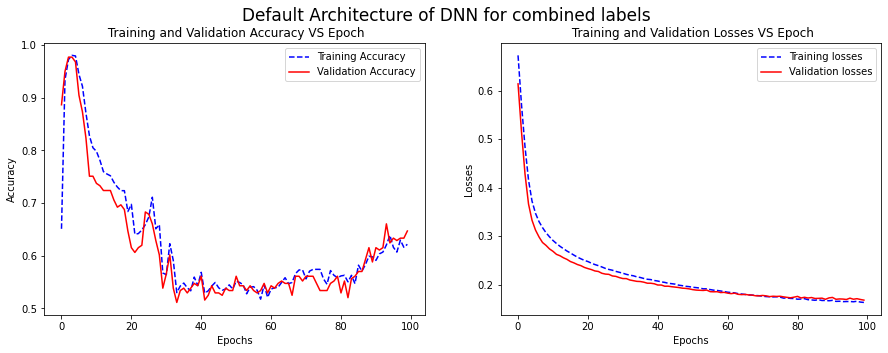

In [22]:
plt.figure(figsize=(15,5)).suptitle("Default Architecture of DNN for combined labels ",fontsize=17)
plt.subplot(1,2,1)
plt.plot(history_mlp.epoch,history_mlp.history['accuracy'],'b--',label = 'Training Accuracy')
plt.plot(history_mlp.epoch,history_mlp.history['val_accuracy'],'r',label = 'Validation Accuracy')
plt.title(' Training and Validation Accuracy VS Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history_mlp.epoch,history_mlp.history['loss'],'b--',label = 'Training losses')
plt.plot(history_mlp.epoch,history_mlp.history['val_loss'],'r',label = 'Validation losses')
plt.title(' Training and Validation Losses VS Epoch')
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend()



Text(0, 0.5, 'Losses')

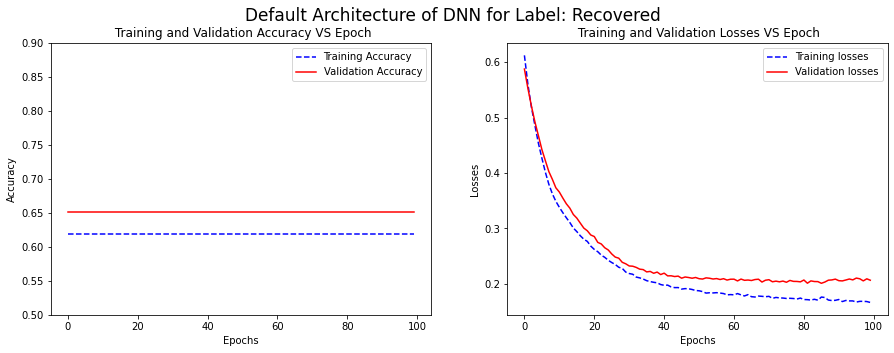

In [30]:
plt.figure(figsize=(15,5)).suptitle("Default Architecture of DNN for Label: Recovered ",fontsize=17)
plt.subplot(1,2,1)
plt.plot(his_recovered.epoch,his_recovered.history['accuracy'],'b--',label = 'Training Accuracy')
plt.plot(his_recovered.epoch,his_recovered.history['val_accuracy'],'r',label = 'Validation Accuracy')
plt.title(' Training and Validation Accuracy VS Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0.5,0.9])
plt.legend()
plt.subplot(1,2,2)
plt.plot(his_recovered.epoch,his_recovered.history['loss'],'b--',label = 'Training losses')
plt.plot(his_recovered.epoch,his_recovered.history['val_loss'],'r',label = 'Validation losses')
plt.title(' Training and Validation Losses VS Epoch')
plt.legend()

plt.xlabel('Epochs')
plt.ylabel('Losses')

Text(0, 0.5, 'Losses')

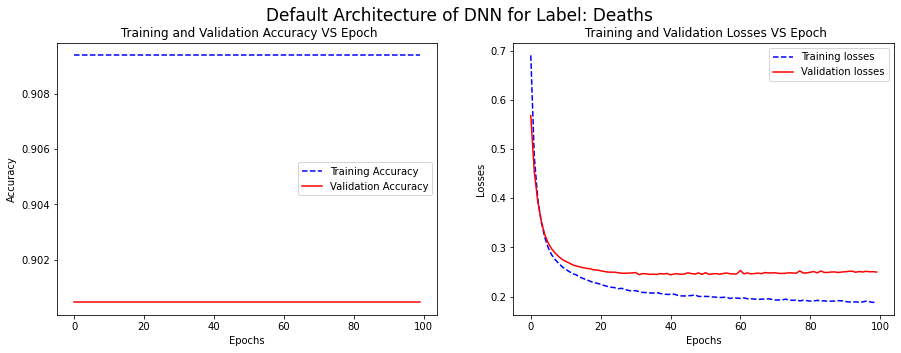

In [37]:
plt.figure(figsize=(15,5)).suptitle("Default Architecture of DNN for Label: Deaths ",fontsize=17)
plt.subplot(1,2,1)
plt.plot(his_deaths.epoch,his_deaths.history['accuracy'],'b--',label = 'Training Accuracy')
plt.plot(his_deaths.epoch,his_deaths.history['val_accuracy'],'r',label = 'Validation Accuracy')
plt.title(' Training and Validation Accuracy VS Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(his_deaths.epoch,his_deaths.history['loss'],'b--',label = 'Training losses')
plt.plot(his_deaths.epoch,his_deaths.history['val_loss'],'r',label = 'Validation losses')
plt.title(' Training and Validation Losses VS Epoch')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Losses')

Text(0, 0.5, 'Losses')

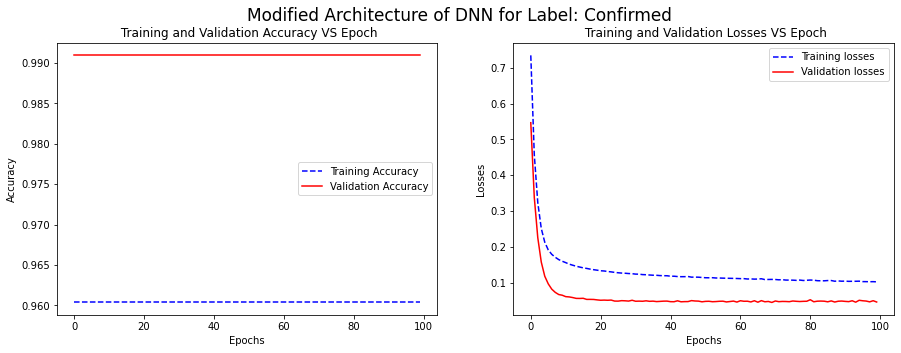

In [58]:
plt.figure(figsize=(15,5)).suptitle("Modified Architecture of DNN for Label: Confirmed ",fontsize=17)
plt.subplot(1,2,1)
plt.plot(his_confirmed.epoch,his_confirmed.history['accuracy'],'b--',label = 'Training Accuracy')
plt.plot(his_confirmed.epoch,his_confirmed.history['val_accuracy'],'r',label = 'Validation Accuracy')
plt.title(' Training and Validation Accuracy VS Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(his_confirmed.epoch,his_confirmed.history['loss'],'b--',label = 'Training losses')
plt.plot(his_confirmed.epoch,his_confirmed.history['val_loss'],'r',label = 'Validation losses')
plt.title(' Training and Validation Losses VS Epoch')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Losses')

Text(0, 0.5, 'Losses')

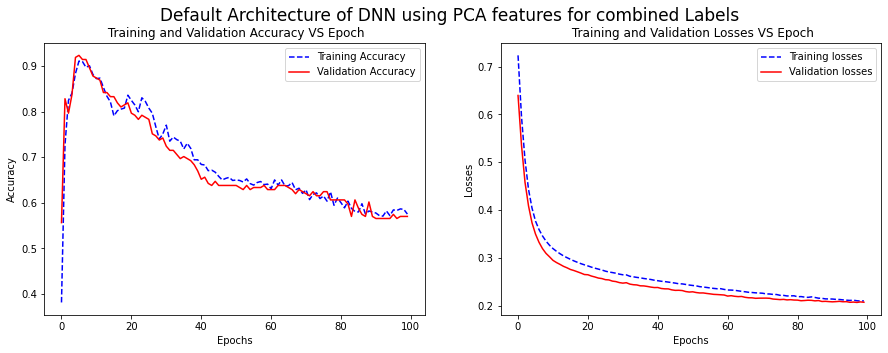

In [60]:
plt.figure(figsize=(15,5)).suptitle("Default Architecture of DNN using PCA features for combined Labels",fontsize=17)
plt.subplot(1,2,1)
plt.plot(his_pmlp.epoch,his_pmlp.history['accuracy'],'b--',label = 'Training Accuracy')
plt.plot(his_pmlp.epoch,his_pmlp.history['val_accuracy'],'r',label = 'Validation Accuracy')
plt.title(' Training and Validation Accuracy VS Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()
plt.subplot(1,2,2)
plt.plot(his_pmlp.epoch,his_pmlp.history['loss'],'b--',label = 'Training losses')
plt.plot(his_pmlp.epoch,his_pmlp.history['val_loss'],'r',label = 'Validation losses')
plt.title(' Training and Validation Losses VS Epoch')
plt.legend()

plt.xlabel('Epochs')
plt.ylabel('Losses')

Text(0, 0.5, 'Losses')

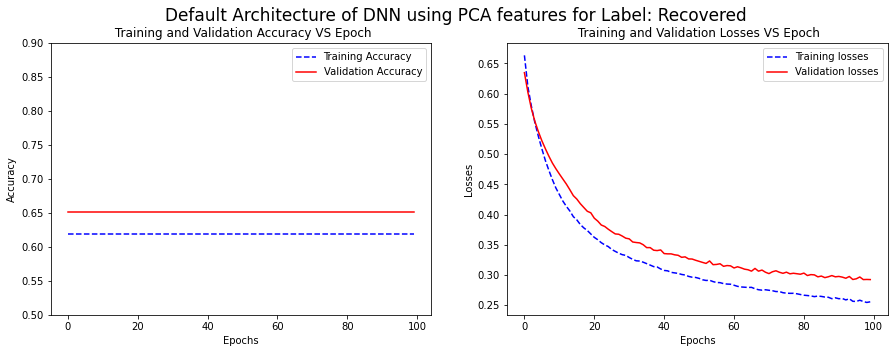

In [66]:
plt.figure(figsize=(15,5)).suptitle("Default Architecture of DNN using PCA features for Label: Recovered",fontsize=17)
plt.subplot(1,2,1)
plt.plot(his_precovered.epoch,his_precovered.history['accuracy'],'b--',label = 'Training Accuracy')
plt.plot(his_precovered.epoch,his_precovered.history['val_accuracy'],'r',label = 'Validation Accuracy')
plt.title(' Training and Validation Accuracy VS Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0.5,0.9])
plt.legend()
plt.subplot(1,2,2)
plt.plot(his_precovered.epoch,his_precovered.history['loss'],'b--',label = 'Training losses')
plt.plot(his_precovered.epoch,his_precovered.history['val_loss'],'r',label = 'Validation losses')
plt.title(' Training and Validation Losses VS Epoch')
plt.legend()

plt.xlabel('Epochs')
plt.ylabel('Losses')

Text(0, 0.5, 'Losses')

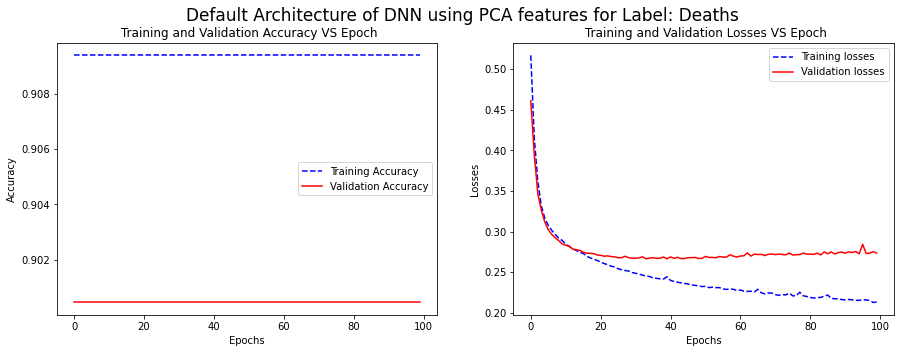

In [77]:
plt.figure(figsize=(15,5)).suptitle("Default Architecture of DNN using PCA features for Label: Deaths",fontsize=17)
plt.subplot(1,2,1)
plt.plot(his_pdeaths.epoch,his_pdeaths.history['accuracy'],'b--',label = 'Training Accuracy')
plt.plot(his_pdeaths.epoch,his_pdeaths.history['val_accuracy'],'r',label = 'Validation Accuracy')
plt.title(' Training and Validation Accuracy VS Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(his_pdeaths.epoch,his_pdeaths.history['loss'],'b--',label = 'Training losses')
plt.plot(his_pdeaths.epoch,his_pdeaths.history['val_loss'],'r',label = 'Validation losses')
plt.title(' Training and Validation Losses VS Epoch')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Losses')


Text(0, 0.5, 'Losses')

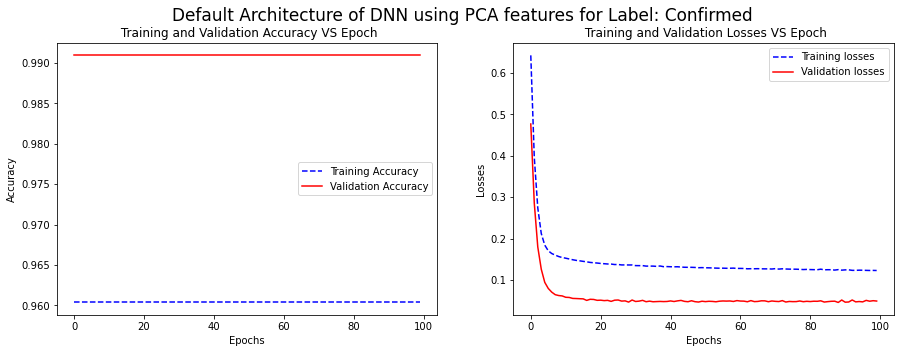

In [83]:
plt.figure(figsize=(15,5)).suptitle("Default Architecture of DNN using PCA features for Label: Confirmed",fontsize=17)
plt.subplot(1,2,1)
plt.plot(his_pconfirmed.epoch,his_pconfirmed.history['accuracy'],'b--',label = 'Training Accuracy')
plt.plot(his_pconfirmed.epoch,his_pconfirmed.history['val_accuracy'],'r',label = 'Validation Accuracy')
plt.title(' Training and Validation Accuracy VS Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(his_pconfirmed.epoch,his_pconfirmed.history['loss'],'b--',label = 'Training losses')
plt.plot(his_pconfirmed.epoch,his_pconfirmed.history['val_loss'],'r',label = 'Validation losses')
plt.title(' Training and Validation Losses VS Epoch')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Losses')

Text(0, 0.5, 'Losses')

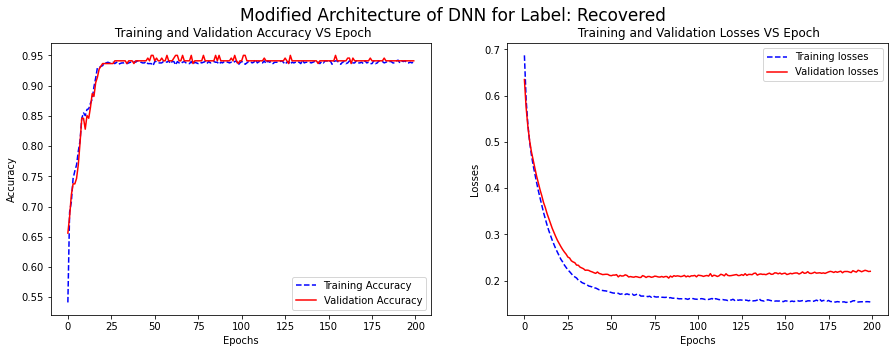

In [89]:
plt.figure(figsize=(15,5)).suptitle("Modified Architecture of DNN for Label: Recovered ",fontsize=17)
plt.subplot(1,2,1)
plt.plot(his_m_rec.epoch,his_m_rec.history['accuracy'],'b--',label = 'Training Accuracy')
plt.plot(his_m_rec.epoch,his_m_rec.history['val_accuracy'],'r',label = 'Validation Accuracy')
plt.title(' Training and Validation Accuracy VS Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(his_m_rec.epoch,his_m_rec.history['loss'],'b--',label = 'Training losses')
plt.plot(his_m_rec.epoch,his_m_rec.history['val_loss'],'r',label = 'Validation losses')
plt.title(' Training and Validation Losses VS Epoch')
plt.legend()

plt.xlabel('Epochs')
plt.ylabel('Losses')

Text(0, 0.5, 'Losses')

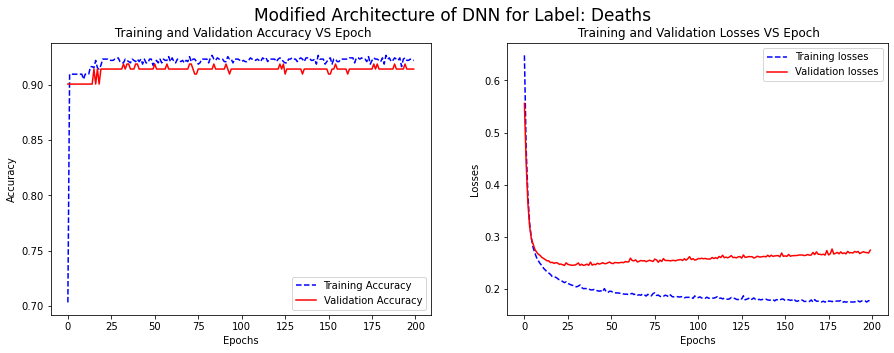

In [149]:
plt.figure(figsize=(15,5)).suptitle("Modified Architecture of DNN for Label: Deaths ",fontsize=17)
plt.subplot(1,2,1)
plt.plot(his_m_deaths.epoch,his_m_deaths.history['accuracy'],'b--',label = 'Training Accuracy')
plt.plot(his_m_deaths.epoch,his_m_deaths.history['val_accuracy'],'r',label = 'Validation Accuracy')
plt.title(' Training and Validation Accuracy VS Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(his_m_deaths.epoch,his_m_deaths.history['loss'],'b--',label = 'Training losses')
plt.plot(his_m_deaths.epoch,his_m_deaths.history['val_loss'],'r',label = 'Validation losses')
plt.title(' Training and Validation Losses VS Epoch')
plt.legend()

plt.xlabel('Epochs')
plt.ylabel('Losses')

Text(0, 0.5, 'Losses')

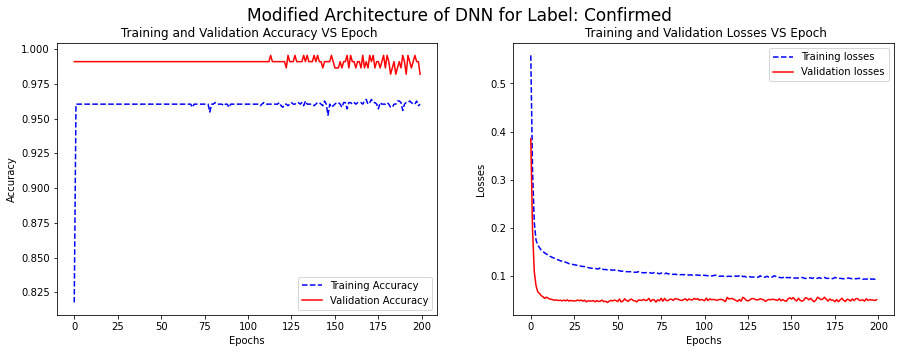

In [163]:
plt.figure(figsize=(15,5)).suptitle("Modified Architecture of DNN for Label: Confirmed ",fontsize=17)
plt.subplot(1,2,1)
plt.plot(his_m_confirmed.epoch,his_m_confirmed.history['accuracy'],'b--',label = 'Training Accuracy')
plt.plot(his_m_confirmed.epoch,his_m_confirmed.history['val_accuracy'],'r',label = 'Validation Accuracy')
plt.title(' Training and Validation Accuracy VS Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(his_m_confirmed.epoch,his_m_confirmed.history['loss'],'b--',label = 'Training losses')
plt.plot(his_m_confirmed.epoch,his_m_confirmed.history['val_loss'],'r',label = 'Validation losses')
plt.title(' Training and Validation Losses VS Epoch')
plt.legend()

plt.xlabel('Epochs')
plt.ylabel('Losses')

Text(0, 0.5, 'Losses')

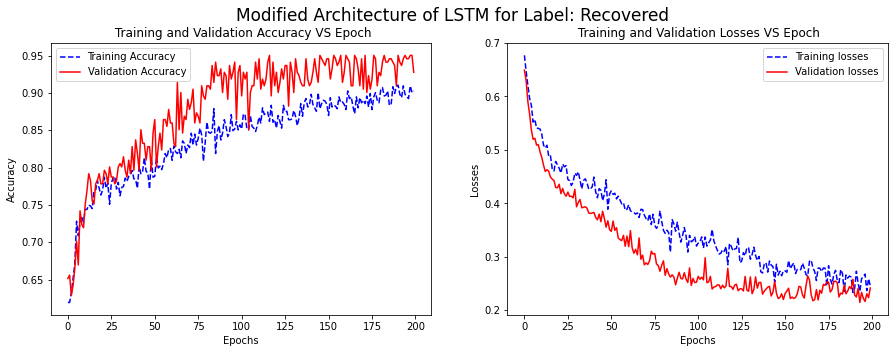

In [169]:
plt.figure(figsize=(15,5)).suptitle("Modified Architecture of LSTM for Label: Recovered ",fontsize=17)
plt.subplot(1,2,1)
plt.plot(his_lstm_r.epoch,his_lstm_r.history['accuracy'],'b--',label = 'Training Accuracy')
plt.plot(his_lstm_r.epoch,his_lstm_r.history['val_accuracy'],'r',label = 'Validation Accuracy')
plt.title(' Training and Validation Accuracy VS Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(his_lstm_r.epoch,his_lstm_r.history['loss'],'b--',label = 'Training losses')
plt.plot(his_lstm_r.epoch,his_lstm_r.history['val_loss'],'r',label = 'Validation losses')
plt.title(' Training and Validation Losses VS Epoch')
plt.legend()

plt.xlabel('Epochs')
plt.ylabel('Losses')

Text(0, 0.5, 'Losses')

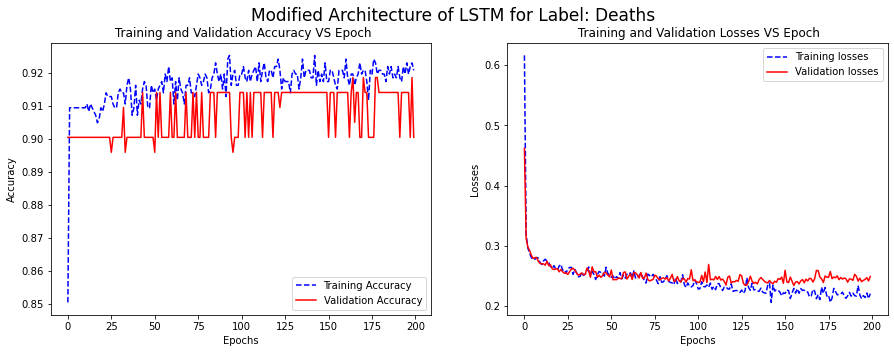

In [213]:
plt.figure(figsize=(15,5)).suptitle("Modified Architecture of LSTM for Label: Deaths ",fontsize=17)
plt.subplot(1,2,1)
plt.plot(his_lstm_d.epoch,his_lstm_d.history['accuracy'],'b--',label = 'Training Accuracy')
plt.plot(his_lstm_d.epoch,his_lstm_d.history['val_accuracy'],'r',label = 'Validation Accuracy')
plt.title(' Training and Validation Accuracy VS Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(his_lstm_d.epoch,his_lstm_d.history['loss'],'b--',label = 'Training losses')
plt.plot(his_lstm_d.epoch,his_lstm_d.history['val_loss'],'r',label = 'Validation losses')
plt.title(' Training and Validation Losses VS Epoch')
plt.legend()

plt.xlabel('Epochs')
plt.ylabel('Losses')

Text(0, 0.5, 'Losses')

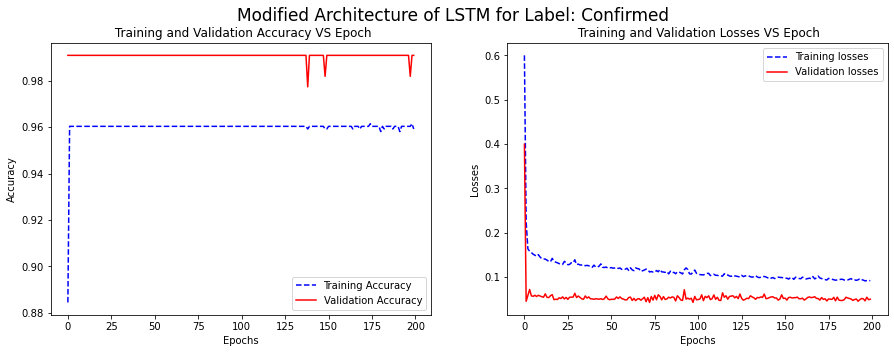

In [238]:
plt.figure(figsize=(15,5)).suptitle("Modified Architecture of LSTM for Label: Confirmed ",fontsize=17)
plt.subplot(1,2,1)
plt.plot(his_lstm_c.epoch,his_lstm_c.history['accuracy'],'b--',label = 'Training Accuracy')
plt.plot(his_lstm_c.epoch,his_lstm_c.history['val_accuracy'],'r',label = 'Validation Accuracy')
plt.title(' Training and Validation Accuracy VS Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(his_lstm_c.epoch,his_lstm_c.history['loss'],'b--',label = 'Training losses')
plt.plot(his_lstm_c.epoch,his_lstm_c.history['val_loss'],'r',label = 'Validation losses')
plt.title(' Training and Validation Losses VS Epoch')
plt.legend()

plt.xlabel('Epochs')
plt.ylabel('Losses')

### Graphs Summary:
The accuracy almost remains constant for the models where the activation function is softmax. It can be inferred from the graphs that the changing accuracy depends on the balance of the output label. Since the output labels: deaths, confirmed are imbalanced, their accuracy almost remains the same. The loss function in all the models is constantly decreasing for training and validation datasets.